<a href="https://colab.research.google.com/github/reguelpangrib29/prak-ml-2217051084-a/blob/main/UTS_ML_RESPONSI_A_2217051084_REGUEL_ANDREAS_AGUSTINUS_PANGARIBUAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UTS

Algoritma method ML yang saya gunakan adalah **DB SCAN**

## Package Install

In [41]:
!pip install kneed

## Import The Library

In [42]:
# Mengimport library numpy dan mengaliasnya sebagai np
import numpy as np

# Mengimport library pandas dan mengaliasnya sebagai pd
import pandas as pd

# Mengimport library plot result
import matplotlib.pyplot as plt

# Mengimport library boxplot
import seaborn as sns

# Mereduksi dataset yang kompleks
from sklearn.decomposition import PCA

# Creating a dataset using make blob
from sklearn import datasets
from sklearn.datasets import make_blobs

# Menormalisasi atau rescale data
from sklearn.preprocessing import StandardScaler

# Mengimplementasi algoritma clustering sesuai dengan nilai parameter dan jumlah kepadatan cluster
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from kneed import KneeLocator

# Menentukan evaluasi score dalam metrics algoritma
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

## Load Data

In [37]:
df = pd.read_csv("https://raw.githubusercontent.com/jhnwlkn/Machine-Leaning/main/customer_support_data.csv")
df.head()

<ipython-input-37-08f1a0f0d078>:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,14,15,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("https://raw.githubusercontent.com/jhnwlkn/Machine-Leaning/main/customer_support_data.csv")
/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,1/8/2023 11:13,1/8/2023 11:47,1-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5.0
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,1/8/2023 12:52,1/8/2023 12:54,1-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5.0
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,1/8/2023 20:16,1/8/2023 20:38,1-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5.0
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,1/8/2023 20:56,1/8/2023 21:16,1-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5.0
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,1/8/2023 10:30,1/8/2023 10:32,1-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5.0


In [43]:
# Load data in X
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.50, random_state=0)

## Exploratory Data Analisis (EDA)

Cek analisis data menggunakan statistika dan visualisasi

In [44]:
# informasi dataframe (jumlah data, jumlah kolom, jumlah baris, tipe data, dll)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                10527 non-null  object 
 1   channel_name             10527 non-null  object 
 2   category                 10527 non-null  object 
 3   Sub-category             10527 non-null  object 
 4   Customer Remarks         3423 non-null   object 
 5   Order_id                 6030 non-null   object 
 6   order_date_time          1698 non-null   object 
 7   Issue_reported at        10527 non-null  object 
 8   issue_responded          10527 non-null  object 
 9   Survey_response_Date     10527 non-null  object 
 10  Customer_City            1684 non-null   object 
 11  Product_category         1696 non-null   object 
 12  Item_price               1698 non-null   float64
 13  connected_handling_time  10 non-null     float64
 14  Agent_name            

In [45]:
# jumlah NaN / missing values setiap column
df.isna().sum()

Unique id                  75380
channel_name               75380
category                   75380
Sub-category               75380
Customer Remarks           82484
Order_id                   79877
order_date_time            84209
Issue_reported at          75380
issue_responded            75380
Survey_response_Date       75380
Customer_City              84223
Product_category           84211
Item_price                 84209
connected_handling_time    85897
Agent_name                 75380
Supervisor                 75380
Manager                    75380
Tenure Bucket              75380
Agent Shift                75380
CSAT Score                 75380
dtype: int64

In [46]:
# informasi statistik dataframe
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Item_price,1698.0,6516.472909,13201.741722,9.0,426.50,999.0,4419.00,134999.0
connected_handling_time,10.0,298.100000,173.490602,0.0,205.25,271.5,403.25,574.0
CSAT Score,10527.0,4.207372,1.416707,1.0,4.00,5.0,5.00,5.0


In [47]:
# cek column names
df.columns

Index(['Unique id', 'channel_name', 'category', 'Sub-category',
       'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Customer_City',
       'Product_category', 'Item_price', 'connected_handling_time',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift',
       'CSAT Score'],
      dtype='object')

In [48]:
# cek min samples dengan perintah array
min_samples = np.arange(2, 20, step=3)
min_samples

array([ 2,  5,  8, 11, 14, 17])

In [49]:
# cek epsilons, dimana data terdistribusi antara 0.03 dan 1, dengan num = 15
epsilons = np.linspace(0.03, 1, num=15)
epsilons

array([0.03      , 0.09928571, 0.16857143, 0.23785714, 0.30714286,
       0.37642857, 0.44571429, 0.515     , 0.58428571, 0.65357143,
       0.72285714, 0.79214286, 0.86142857, 0.93071429, 1.        ])

In [50]:
# cek ketersediaan data
print("\nJumlah Data Hilang dalam Kolom 'connected_handling_time':", df['connected_handling_time'].isnull().sum())


Jumlah Data Hilang dalam Kolom 'connected_handling_time': 85897


<Axes: ylabel='connected_handling_time'>

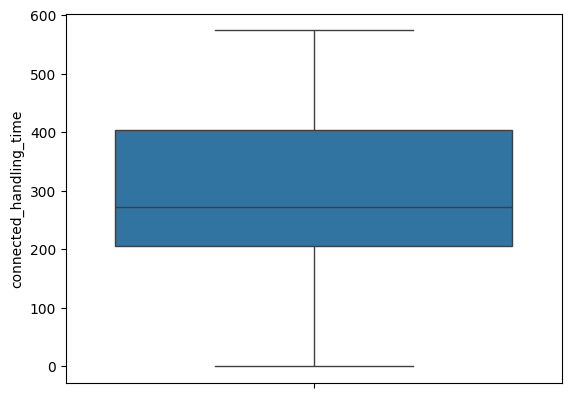

In [51]:
# cek outlier data
sns.boxplot(df['connected_handling_time'])

In [52]:
# explore distribusi nilai
# memeriksa lalu menyeleksi nilai jika ada pengubahan tipe data menjadi kolom numerik
print("Distribusi nilai dalam kolom 'Item_price':")
print(df['Item_price'].value_counts())
print()

print("Distribusi nilai dalam kolom 'connected_handling_time':")
print(df['connected_handling_time'].value_counts())
print()

df['Item_price'] = pd.to_numeric(df['Item_price'], errors='coerce')

print("Nilai unik dalam kolom 'Item_price' setelah konversi:")
print(df['Item_price'].unique())
print()

print("Nilai unik dalam kolom 'connected_handling_time':")
print(df['connected_handling_time'].unique())
print()

print("Nilai unik dalam kolom 'CSAT Score':")
print(df['CSAT Score'].unique())

Distribusi nilai dalam kolom 'Item_price':
Item_price
999.0      53
32999.0    46
1499.0     36
299.0      30
499.0      29
           ..
12628.0     1
540.0       1
6699.0      1
1071.0      1
1087.0      1
Name: count, Length: 783, dtype: int64

Distribusi nilai dalam kolom 'connected_handling_time':
connected_handling_time
206.0    1
303.0    1
156.0    1
0.0      1
240.0    1
205.0    1
574.0    1
514.0    1
415.0    1
368.0    1
Name: count, dtype: int64

Nilai unik dalam kolom 'Item_price' setelah konversi:
[        nan 4.34000e+02 1.29900e+03 1.59900e+04 1.09900e+03 9.99990e+04
 3.19900e+03 6.64000e+02 1.11590e+04 6.99000e+02 7.99000e+02 2.49990e+04
 1.54900e+04 1.66000e+02 1.09990e+04 2.12900e+03 1.99000e+02 2.95000e+02
 7.99900e+03 1.49900e+03 1.79900e+03 9.99000e+02 2.19990e+04 4.47000e+02
 1.63900e+04 2.59900e+04 1.49990e+04 4.17000e+02 1.19990e+04 2.03000e+02
 1.45300e+03 4.99000e+02 1.70000e+01 1.69900e+03 1.89900e+04 2.75000e+02
 6.49900e+03 2.49900e+03 1.37600e+03 2.3990

## Preprocessing

In [53]:
# hapus data outlier
df.loc[df["connected_handling_time"]<0, "connected_handling_time"] = np.nan
df.loc[df["connected_handling_time"]>100, "connected_handling_time"] = np.nan

In [54]:
# # assign missing values dengan mean untuk setiap column yang ada missing nya
df["connected_handling_time"].fillna(value=df["connected_handling_time"].mean(), inplace=True)
df["Item_price"].fillna(value=df["Item_price"].mean(), inplace=True)
df["CSAT Score"].fillna(value=df["CSAT Score"].mean(), inplace=True)

In [55]:
# mengabaikan indeks-indeks yang tidak ada dalam dataframe dan melanjutkan dengan menghapus indeks-indeks yang ada
df.drop(index=range(10527, 85906+1), inplace=True, errors='ignore')

In [56]:
# hapus non-numeric columns
df_numeric = df.select_dtypes(include=['number'])

In [57]:
# handle missing values if needed
df_numeric.dropna(inplace=True)

In [58]:
# rescale data-nya
data_scaler = StandardScaler()
scaled_data = data_scaler.fit_transform(df_numeric)

## Modeling

Modeling / Training data menggunakan algoritma hierarchical clustering

In [59]:
# mencari rentang nilai disetiap tetangga
nbrs = NearestNeighbors().fit(scaled_data)
neigh_dist, neigh_ind = nbrs.kneighbors(scaled_data)
sort_neigh_dist = np.sort(neigh_dist, axis = 0)

In [60]:
# plot datanya
k_dist = sort_neigh_dist[:, 4]
kneedle = KneeLocator(x = range(1, len(neigh_dist)+1), y = k_dist, S = 1.0,
                      curve = "concave", direction = "increasing", online=True)

3.246343315500315


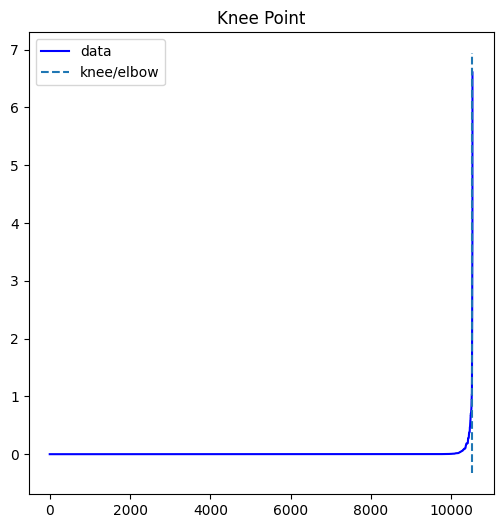

In [61]:
# mencari nilai epsilon yang didapat dari knee poin
print(kneedle.knee_y)
kneedle.plot_knee()
plt.show()

In [62]:
clusters = DBSCAN(eps = 2, min_samples = 4).fit(scaled_data)
label = clusters.labels_
np.unique(label)

array([-1,  0,  1])

In [63]:
# mengelompokkan data clustering yang berbasis pada kerapatan data
# menggunakan atribut core_sample_indices_, yang berisi indeks dari titik-titik data yang dianggap sebagai pusat klaster.
db = DBSCAN(eps=0.5, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

## Visualization

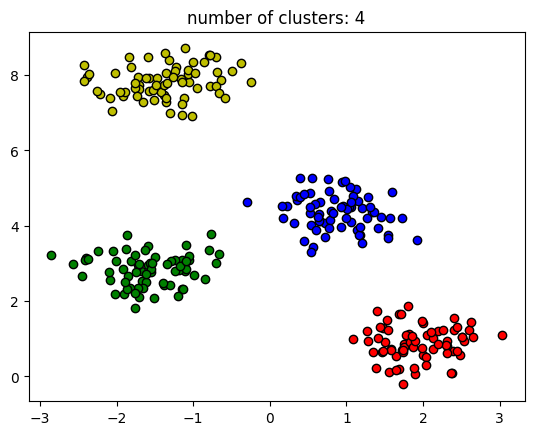

In [64]:
# menjumlahkan cluster dalam label, mengabaikan noise jika ada
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# warna hitam dihilangkan dan digunakan untuk noise
unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r']
for k, col in zip(unique_labels, colors):
    if k == -1:
        # digunakan untuk noise
        col = 'k'

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)

# plot results
plt.title('number of clusters: %d' % n_clusters_)
plt.show()

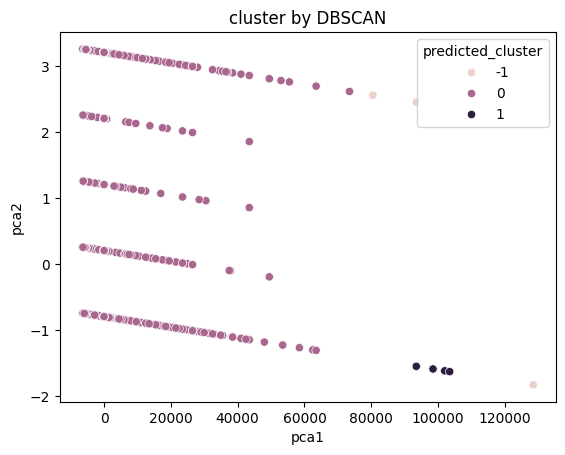

In [65]:
df["predicted_cluster"] = label
# df_clean = df.drop(['Unique id', 'Agent_name'], axis=1)
reduced_data = PCA(n_components=2).fit_transform(df_numeric)
df_reduced_data = pd.DataFrame(reduced_data, columns=["pca1", "pca2"])
sns.scatterplot(x = "pca1", y = "pca2", hue = df["predicted_cluster"], data = df_reduced_data)
plt.title("cluster by DBSCAN")
plt.show()

## Evaluation

In [66]:
ss = silhouette_score(df_numeric, label)
print(f"Akurasi berdasarkan Silhouette score adalah: {ss}")

Akurasi berdasarkan Silhouette score adalah: 0.9728223153386443


In [67]:
# Interpretasi hasil klasterisasi
if ss > 0.5:
  print("Silhouette Score menunjukkan pemisahan klaster yang sangat baik.")
elif 0.25 <= ss <= 0.5:
  print("Silhouette Score menunjukkan pemisahan klaster yang cukup baik.")
elif 0.1 <= ss < 0.25:
  print("Silhouette Score menunjukkan pemisahan klaster yang masih bisa diterima.")
else:
  print("Silhouette Score menunjukkan pemisahan klaster yang buruk. Perlu evaluasi lebih lanjut.")

Silhouette Score menunjukkan pemisahan klaster yang sangat baik.


**Penjelasan kenapa saya menggunakan metode evaluasi "silhouette score" pada metode algoritma DB Scan ini :**

1. Mengukur Kompakitas dan Pemisahan: "Silhouette score" mengukur seberapa dekat setiap titik dalam suatu cluster dengan titik-titik lain dalam cluster yang sama, serta seberapa jauh titik-titik dalam suatu cluster tersebut dari cluster lain. Ini adalah ukuran yang baik untuk mengevaluasi baiknya pembentukan cluster dalam DB Scan, karena DB Scan berusaha untuk membentuk cluster yang padat (kompak) dan memisahkan antara cluster dengan baik.

2. Rentang Nilai Antara -1 dan 1: "Silhouette score" memberikan skor dalam rentang antara -1 dan 1. Skor yang lebih tinggi menunjukkan bahwa titik-titik dalam suatu cluster berada lebih dekat satu sama lain daripada dengan cluster lain, sedangkan skor yang lebih rendah menunjukkan sebaliknya. Nilai positif menunjukkan bahwa cluster telah terbentuk dengan baik, sedangkan nilai negatif menunjukkan bahwa titik-titik mungkin telah ditempatkan di cluster yang salah.

3. Mudah Diinterpretasikan: Skor silhouette relatif mudah diinterpretasikan. Skor mendekati 1 menunjukkan bahwa cluster terbentuk dengan baik, sedangkan skor mendekati -1 menunjukkan bahwa cluster mungkin tidak terbentuk dengan baik.

**Penjelasan kenapa menggunakan metode algoritma "DB Scan" ketimbang metode algoritma ML lainnya : **

1. DB Scan mampu menangani cluster dengan bentuk dan ukuran yang beragam, serta cluster yang mungkin tidak teratur dan berbentuk kompleks. Ini karena DB Scan tidak mengasumsikan cluster memiliki bentuk atau ukuran tertentu seperti yang dilakukan oleh algoritma k-means.

2. DB Scan tidak memerlukan jumlah cluster yang diketahui sebelumnya. Ini berarti kita tidak perlu mengatur jumlah cluster sebelumnya seperti yang Anda perlukan dalam algoritma k-means atau agglomerative clustering.

3. DB Scan lebih efisien dalam menangani data dengan kepadatan yang bervariasi dibandingkan dengan k-means atau agglomerative clustering. Ini karena DB Scan tidak memerlukan penghitungan rata-rata atau perubahan iteratif selama proses clustering.

4. DB Scan menawarkan beberapa keunggulan dibandingkan algoritma pengelompokan tradisional,
seperti kemampuan untuk mengidentifikasi kelompok bentuk dan pegangan yang berubah-ubah
outlier secara efektif. Namun, mengatur parameter epsilon dan MinPts
secara tepat dapat menjadi tantangan dan mungkin memerlukan pengetahuan domain atau percobaan.